# Team Strength Analysis

There are a number of metrics available to measure the strength of a team in FPL:

1. **Fixture Difficulty Rating (FDR):** The FDR is based on a complex algorithm developed by FPL experts. A set of formulas process key Opta data variables, along with each team's home and away form for the past six matches, to generate a rank for the perceived difficulty of each Gameweek opponent. The FDR is designed to help FPL managers plan their transfer and team selection strategy. It is reviewed on a weekly basis and updated as the season progresses.

From our dataset, we also have a file called `teams.csv`, which is uploaded at the start of the season and is not updated as the season progresses. In this file, the following metrics are available:

2. **Strength:** Seems related to FDR but again it does not change week to week. Ordinal variable. No distinction between attacking and defensive strength.

3. **Strength overall home:** Continuous variable. Average of **Strength attack home** and **Strength defence home**.

4. **Strength overall away:** Continuous variable. Average of **Strength attack away** and **Strength defence away**.

Ultimately, the attacking and defensive strength is measured by number of goals scored and goals conceded respectively. But as the season progresses, these metrics may be a noisey signal, skewed by outlier matches, and we don't know ahead of time what the value will be at the end of the season. So we need to figure out a good indicator of this.

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Fixture Difficulty Rating

## Read data:

In [2]:
fixtures_path = '../data/Fantasy-Premier-League/data/2022-23/fixtures.csv'
fixtures = pd.read_csv(fixtures_path)
fixtures

,code,event,finished,finished_provisional,id,kickoff_time,minutes,provisional_start_time,started,team_a,team_a_score,team_h,team_h_score,stats,team_h_difficulty,team_a_difficulty,pulse_id
0,2292810,1,True,True,1,2022-08-05T19:00:00Z,90,False,True,1,2,7,0,"[{'identifier': 'goals_scored', 'a': [{'value'...",4,2,74911
1,2292813,1,True,True,4,2022-08-06T11:30:00Z,90,False,True,12,2,9,2,"[{'identifier': 'goals_scored', 'a': [{'value'...",4,2,74914
2,2292811,1,True,True,2,2022-08-06T14:00:00Z,90,False,True,2,0,3,2,"[{'identifier': 'goals_scored', 'a': [], 'h': ...",2,2,74912
3,2292814,1,True,True,5,2022-08-06T14:00:00Z,90,False,True,20,1,11,2,"[{'identifier': 'goals_scored', 'a': [{'value'...",2,2,74915
4,2292816,1,True,True,7,2022-08-06T14:00:00Z,90,False,True,16,0,15,2,"[{'identifier': 'goals_scored', 'a': [], 'h': ...",2,4,74917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,2293185,38,True,True,376,2023-05-28T15:30:00Z,90,False,True,3,0,8,1,"[{'identifier': 'goals_scored', 'a': [], 'h': ...",2,2,75286
376,2293186,38,True,True,377,2023-05-28T15:30:00Z,90,False,True,18,4,11,1,"[{'identifier': 'goals_scored', 'a': [{'value'...",3,2,75287
377,2293187,38,True,True,378,2023-05-28T15:30:00Z,90,False,True,19,1,10,2,"[{'identifier': 'goals_scored', 'a': [{'value'...",2,3,75288
378,2293188,38,True,True,379,2023-05-28T15:30:00Z,90,False,True,9,1,14,2,"[{'identifier': 'goals_scored', 'a': [{'value'...",2,4,75289


In [3]:
teams_path = '../data/Fantasy-Premier-League/data/2022-23/teams.csv'
teams = pd.read_csv(teams_path)
teams

,code,draw,form,id,loss,name,played,points,position,short_name,...,team_division,unavailable,win,strength_overall_home,strength_overall_away,strength_attack_home,strength_attack_away,strength_defence_home,strength_defence_away,pulse_id
0,3,0,NaN,1,0,Arsenal,0,0,0,ARS,...,NaN,False,0,1245,1285,1250,1250,1240,1320,1
1,7,0,NaN,2,0,Aston Villa,0,0,0,AVL,...,NaN,False,0,1070,1100,1070,1075,1070,1130,2
2,91,0,NaN,3,0,Bournemouth,0,0,0,BOU,...,NaN,False,0,1035,1095,1020,1110,1050,1080,127
3,94,0,NaN,4,0,Brentford,0,0,0,BRE,...,NaN,False,0,1115,1180,1100,1160,1130,1200,130
4,36,0,NaN,5,0,Brighton,0,0,0,BHA,...,NaN,False,0,1170,1175,1140,1150,1200,1200,131
5,8,0,NaN,6,0,Chelsea,0,0,0,CHE,...,NaN,False,0,1165,1220,1190,1220,1140,1220,4
6,31,0,NaN,7,0,Crystal Palace,0,0,0,CRY,...,NaN,False,0,1085,1100,1110,1110,1060,1090,6
7,11,0,NaN,8,0,Everton,0,0,0,EVE,...,NaN,False,0,1055,1095,1070,1100,1040,1090,7
8,54,0,NaN,9,0,Fulham,0,0,0,FUL,...,NaN,False,0,1095,1100,1070,1065,1120,1140,34
9,13,0,NaN,10,0,Leicester,0,0,0,LEI,...,NaN,False,0,1130,1115,1065,1110,1200,1120,26


In [4]:
away_data = fixtures.loc[:,['team_a','team_a_score','team_h_score','team_h_difficulty']]
team_name_map = dict(zip(teams.id,teams.short_name))
away_data.team_a = away_data.team_a.map(team_name_map)
away_data.rename(columns={'team_a':'name','team_a_score':'goals_scored','team_h_score':'goals_conceded','team_h_difficulty':'FDR_rank'},inplace=True)
away_data

,name,goals_scored,goals_conceded,FDR_rank
0,ARS,2,0,4
1,LIV,2,2,4
2,AVL,0,2,2
3,WOL,1,2,2
4,NFO,0,2,2
...,...,...,...,...
375,BOU,0,1,2
376,TOT,4,1,3
377,WHU,1,2,2
378,FUL,1,2,2


In [5]:
home_data = fixtures.loc[:,['team_h','team_h_score','team_a_score','team_a_difficulty']]
home_data.team_h = home_data.team_h.map(team_name_map)
home_data.rename(columns={'team_h':'name','team_h_score':'goals_scored','team_a_score':'goals_conceded','team_a_difficulty':'FDR_rank'},inplace=True)
home_data

,name,goals_scored,goals_conceded,FDR_rank
0,CRY,0,2,2
1,FUL,2,2,2
2,BOU,2,0,2
3,LEE,2,1,2
4,NEW,2,0,4
...,...,...,...,...
375,EVE,1,0,2
376,LEE,1,4,2
377,LEI,2,1,3
378,MUN,2,1,4


In [9]:
home_away_data = pd.concat([home_data,away_data])
home_away_data.index = range(len(home_away_data))
home_away_data

,name,goals_scored,goals_conceded,FDR_rank
0,CRY,0,2,2
1,FUL,2,2,2
2,BOU,2,0,2
3,LEE,2,1,2
4,NEW,2,0,4
...,...,...,...,...
755,BOU,0,1,2
756,TOT,4,1,3
757,WHU,1,2,2
758,FUL,1,2,2


## Measuring Attacking Strength with FDR:

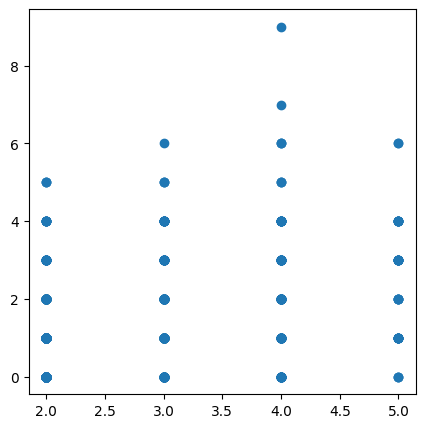

In [11]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(5,5))

ax.scatter(home_away_data.FDR_rank, home_away_data.goals_scored)

In [15]:
home_away_data.goals_scored.max()

9

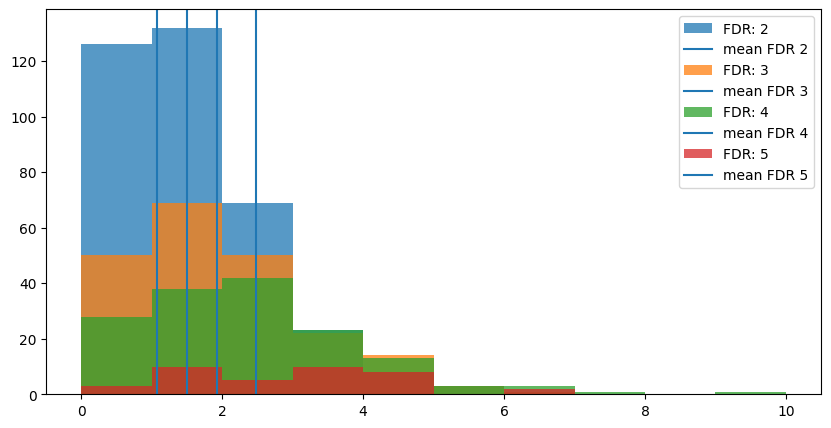

In [23]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10,5))

ax.hist(home_away_data.loc[home_away_data.FDR_rank == 2,'goals_scored'], label='FDR: 2',bins=[0,1,2,3,4,5,6,7,8,9,10],alpha=0.75)
ax.axvline(x=home_away_data.loc[home_away_data.FDR_rank == 2,'goals_scored'].mean(),label='mean FDR 2')
ax.hist(home_away_data.loc[home_away_data.FDR_rank == 3,'goals_scored'], label='FDR: 3',bins=[0,1,2,3,4,5,6,7,8,9,10],alpha=0.75)
ax.axvline(x=home_away_data.loc[home_away_data.FDR_rank == 3,'goals_scored'].mean(),label='mean FDR 3')
ax.hist(home_away_data.loc[home_away_data.FDR_rank == 4,'goals_scored'], label='FDR: 4',bins=[0,1,2,3,4,5,6,7,8,9,10],alpha=0.75)
ax.axvline(x=home_away_data.loc[home_away_data.FDR_rank == 4,'goals_scored'].mean(),label='mean FDR 4')
ax.hist(home_away_data.loc[home_away_data.FDR_rank == 5,'goals_scored'], label='FDR: 5',bins=[0,1,2,3,4,5,6,7,8,9,10],alpha=0.75)
ax.axvline(x=home_away_data.loc[home_away_data.FDR_rank == 5,'goals_scored'].mean(),label='mean FDR 5')
ax.legend()

In [25]:
home_away_data.FDR_rank.unique()

array([2, 4, 3, 5], dtype=int64)

In [37]:
ranks = sorted(home_away_data.FDR_rank.unique())
goals_scored = []
goals_conceded = []
for rank in ranks:
    goals_scored.append(home_away_data.loc[home_away_data.FDR_rank == rank,'goals_scored'].values)
    goals_conceded.append(home_away_data.loc[home_away_data.FDR_rank == rank,'goals_conceded'].values)

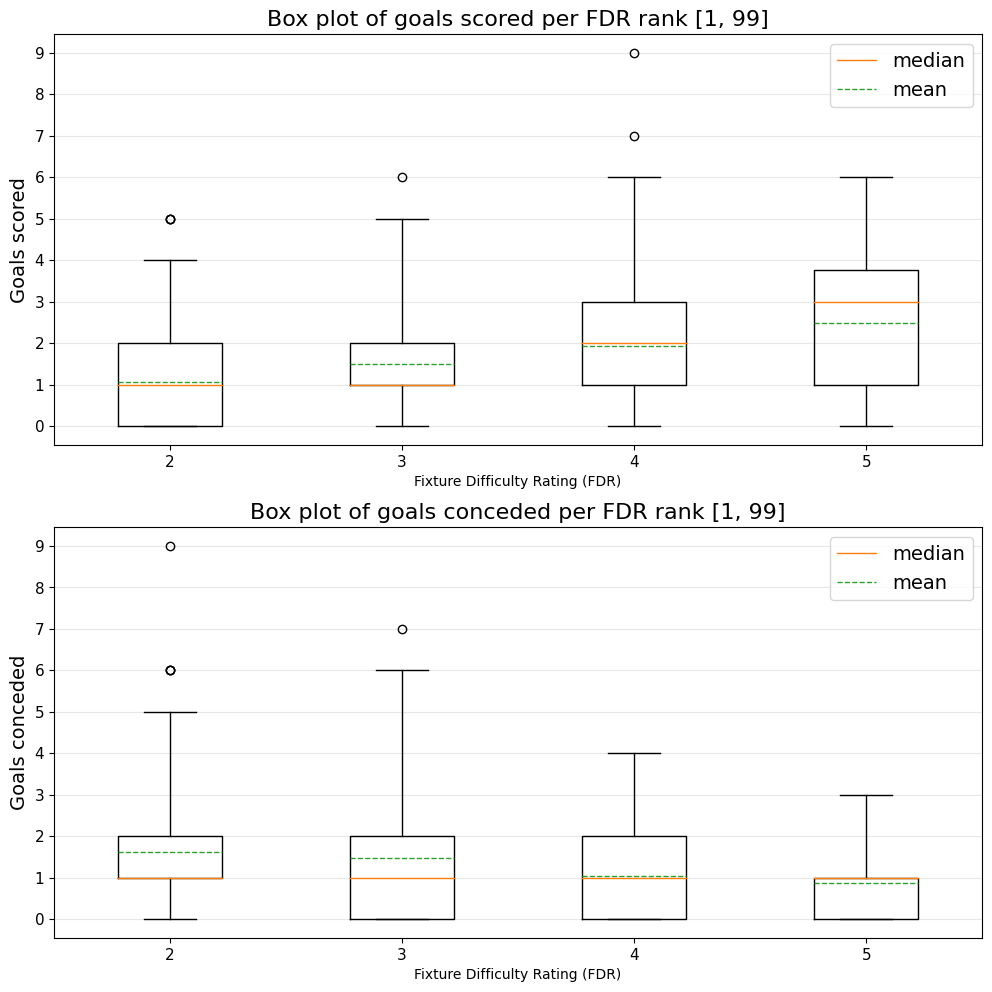

In [39]:
title_font = 18
axis_title_font = 16
legend_font = 14
axis_label_font = 14
axis_tick_font = 11

fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(10,10))

box_dict = ax[0].boxplot(goals_scored, whis=(1,99), labels = ranks, meanline = True, showmeans = True)
_ = ax[0].set_xticklabels(ax[0].get_xticklabels(), fontsize = axis_tick_font)
ax[0].set_yticks(range(home_away_data.goals_scored.max()+1))
_ = ax[0].set_yticklabels(ax[0].get_yticklabels(), fontsize = axis_tick_font)
ax[0].set_ylabel('Goals scored', fontsize = axis_label_font)
ax[0].set_xlabel('Fixture Difficulty Rating (FDR)')
ax[0].grid(axis = 'y', alpha = 0.3)
ax[0].legend([box_dict['medians'][0], box_dict['means'][0]], ['median', 'mean'], fontsize = legend_font)
ax[0].set_title('''Box plot of goals scored per FDR rank [1, 99]''', fontsize = axis_title_font)

box_dict = ax[1].boxplot(goals_conceded, whis=(1,99), labels = ranks, meanline = True, showmeans = True)
_ = ax[1].set_xticklabels(ax[1].get_xticklabels(), fontsize = axis_tick_font)
ax[1].set_yticks(range(home_away_data.goals_conceded.max()+1))
_ = ax[1].set_yticklabels(ax[1].get_yticklabels(), fontsize = axis_tick_font)
ax[1].set_ylabel('Goals conceded', fontsize = axis_label_font)
ax[1].set_xlabel('Fixture Difficulty Rating (FDR)')
ax[1].grid(axis = 'y', alpha = 0.3)
ax[1].legend([box_dict['medians'][0], box_dict['means'][0]], ['median', 'mean'], fontsize = legend_font)
ax[1].set_title('''Box plot of goals conceded per FDR rank [1, 99]''', fontsize = axis_title_font)

fig.tight_layout(pad=1.0)
plt.savefig('./plots/FDR_goals_scored_conceded_boxplots.png', bbox_inches = 'tight')
plt.show()